In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Data points

In [3]:
# Parameters
mean = 0            # Mean of the Gaussian distribution
std_dev = 1         # Standard deviation (spread of the noise)
size = 1000         # Number of random values to generate

# Generate Gaussian random data point
x = np.random.normal(loc=mean, scale=std_dev, size=size)

### Mean
### $\hat{\mu}$ = $\frac{1}{n}\sum_{i=1}^{n} x_i$

In [4]:
def mean(x):
    return np.sum(x) / len(x)
    
print("Mean:", mean(x))
print("Correct", (mean(x) == np.mean(x)).item())

Mean: 0.007680873854039091
Correct True


### Variance
### $\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$

In [5]:
def variance(x):
    return np.sum((x - mean(x)) ** 2) / len(x)

print(variance(x))
print("Correct:", (variance(x) == np.var(x)).item())

0.9904088689584629
Correct: True


### Standard deviation
### $\hat{\sigma} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}$

In [6]:
def std_dev(x):
    return np.sqrt(np.sum((x - mean(x)) ** 2) / len(x))

print(std_dev(x))
print("Correct:", (std_dev(x) == np.std(x)).item())

0.9951928802792266
Correct: True


### Normal distribution (PDF)
### $f(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

Text(0.5, 1.0, 'Normal Distribution')

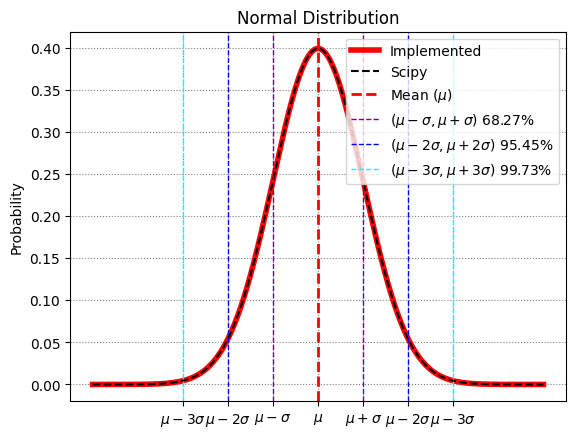

In [14]:
def normal_dist(x, mu, sigma):
    return (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp((-(x-mu) ** 2) / (2 * sigma ** 2))

mu = 0
sigma = 1

x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)

cdf_1sigma = stats.norm.cdf(mu + sigma, loc=mu, scale=sigma) - stats.norm.cdf(mu - sigma, loc=mu, scale=sigma)
cdf_2sigma = stats.norm.cdf(mu + 2*sigma, loc=mu, scale=sigma) - stats.norm.cdf(mu - 2*sigma, loc=mu, scale=sigma)
cdf_3sigma = stats.norm.cdf(mu + 3*sigma, loc=mu, scale=sigma) - stats.norm.cdf(mu - 3*sigma, loc=mu, scale=sigma)

plt.plot(x, normal_dist(x, mu, sigma), color="red", linewidth=4, label="Implemented")
plt.plot(x, stats.norm.pdf(x, loc=mu, scale=sigma), color="black", linestyle="--", label="Scipy")

plt.axvline(x=mu, color="red", linestyle="--", linewidth=2, label=r"Mean ($\mu$)")
plt.axvline(x=mu + sigma, color="purple", linestyle="--", linewidth=1, label=f"($\mu - \sigma, \mu + \sigma$) {cdf_1sigma*100:.2f}%")
plt.axvline(x=mu - sigma, color="purple", linestyle="--", linewidth=1)
plt.axvline(x=mu + sigma * 2, color="blue", linestyle="--", linewidth=1, label=f"($\mu - 2\sigma, \mu + 2\sigma$) {cdf_2sigma*100:.2f}%")
plt.axvline(x=mu - sigma * 2, color="blue", linestyle="--", linewidth=1)
plt.axvline(x=mu + sigma * 3, color="cyan", linestyle="--", linewidth=1, label=f"($\mu - 3\sigma, \mu + 3\sigma$) {cdf_3sigma*100:.2f}%")
plt.axvline(x=mu - sigma * 3, color="cyan", linestyle="--", linewidth=1)

plt.xticks([mu - 3 * sigma, mu - 2 * sigma, mu - sigma, mu, mu + sigma, mu + 2 * sigma, mu + 3* sigma], [r"$\mu - 3\sigma$", r"$\mu - 2\sigma$", r"$\mu - \sigma$", r"$\mu$", r"$\mu + \sigma$", r"$\mu - 2\sigma$", r"$\mu - 3\sigma$"])
plt.tick_params(axis="x", labelsize=10)

plt.grid(True, linestyle=":", color="gray")

plt.legend()
plt.ylabel("Probability")
plt.title("Normal Distribution")

### Cumulative distribution (CDF)

### $ g(x)_i = \sum_{i=1}^{n}{f(x \mid \mu, \sigma)_i}$

Text(0.5, 1.0, 'Cumulative Distribution')

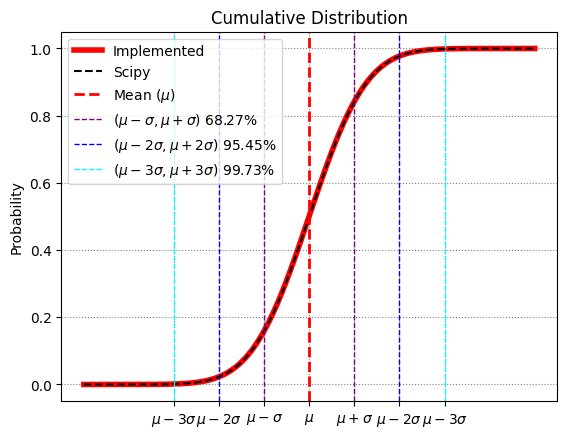

In [ ]:
def cdf_dist(x, mu, sigma):
    delta_x = (x[-1] - x[0]) / (len(x) - 1)
    return np.cumsum(normal_dist(x, mu, sigma)) * delta_x

mu = 0
sigma = 1

x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)

plt.plot(x, cdf_dist(x, mu, sigma), color="red", linewidth=4, label="Implemented")
plt.plot(x, stats.norm.cdf(x, loc=mu, scale=sigma), color="black", linestyle="--", label="Scipy")

plt.tick_params(axis="x", labelsize=10)

plt.grid(True, linestyle=":", color="gray")

plt.legend()

plt.ylabel("Probability")
plt.title("Cumulative Distribution")